In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import scipy.optimize as opt

In [2]:
def read_data():
    return pd.read_csv("ex2data1.txt", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])


In [3]:
data = read_data()
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


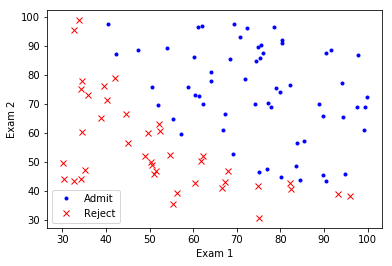

In [4]:
admits = data[data['Admitted'].isin([1])]
rejects = data[data['Admitted'].isin([0])]

plt.plot(admits['Exam 1'], admits['Exam 2'], 'b.', label="Admit")
plt.plot(rejects['Exam 1'], rejects['Exam 2'], 'rx', label="Reject")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.show()


## Define & plot the sigmoid func

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

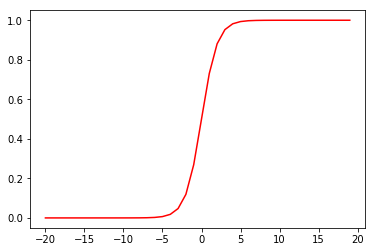

In [6]:
plt.plot(np.arange(-20, 20), sigmoid(np.arange(-20, 20)), 'r')
plt.show()

## Define the cost func

In [7]:
def htheta(x, theta):
    return sigmoid(x * theta.T)

def get_cost(theta, X, y):
    theta = np.matrix(theta)
    m = -len(y)
    cost_sum = np.sum(np.multiply(y, np.log(htheta(X, theta))) + np.multiply((1 - y), np.log(1 - htheta(X, theta))))
    return cost_sum/m



## Parse data

In [8]:
data = read_data()
data.insert(0, 'Ones', 1)

num_cols = data.shape[1]
X = data.iloc[:,0:num_cols-1]
y = data.iloc[:,num_cols-1:num_cols]

X = np.matrix(np.array(X.values))
y = np.matrix(np.array(y.values))
theta = np.zeros(3)



In [9]:
print get_cost(theta,X,y)

0.69314718056


## Try cost for another theta

In [10]:
print get_cost(np.array([-1,0,0]), X,y)

0.913261687518


## Formula for gradient (partial derivative)
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$

In [11]:
def get_gradient(theta, X, y):
    theta = np.matrix(theta)
    gradient_vector = np.zeros(theta.shape[1])
    m = len(y)
    
    for i in range(theta.shape[1]): 
        # gradient = (1/m) summation ((htheta(x) - y) * x)
        gradient_vector[i] = np.sum(np.multiply((htheta(X, theta) - y), X[:,i]))
    
    return gradient_vector / m

## Get the gradient and cost for [0 0 0] theta

In [13]:
print "Gradient term for default theta=>", get_gradient(theta, X, y)
print "Cost for default theta =>", get_cost(theta, X, y)

 Gradient term for default theta=> [ -0.1        -12.00921659 -11.26284221]
Cost for default theta => 0.69314718056


##  Using fmin_tnc

In [14]:
res_1 = opt.fmin_tnc(func=get_cost, x0=theta, fprime=get_gradient, args=(X, y))
res_1

(array([-25.16131861,   0.20623159,   0.20147149]), 36, 0)

##  Using minimize TNC method

In [15]:
res_2 = opt.minimize(get_cost, theta, args=(X,y), method='TNC', jac=get_gradient, options={'maxiter':400})
res_2

     fun: 0.20349770158947472
     jac: array([  8.91992787e-09,   7.94888116e-08,   4.74000881e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131861,   0.20623159,   0.20147149])

##  Using minimize CG / BFGS / L-BFGS-B methods 

Note: Find out why np.log(0) is RuntimeWarning occurs

In [16]:
res_3 = opt.minimize(get_cost, theta, args=(X,y), method='BFGS', jac=get_gradient, options={'maxiter':400})
res_3

      fun: 0.2034977015894439
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476814e-09,  -9.31921315e-07,  -2.82608925e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

## Find costs using the results above

In [17]:
get_cost(res_1[0], X, y) #fmin_tnc

0.20349770158947472

In [18]:
get_cost(res_2.x, X, y) #minimize method='TNC' 

0.20349770158947472

In [19]:
get_cost(res_3.x, X, y) #minimize method='BFGS'

0.20349770158944391

## Write the predict function

In [25]:
def predict(theta, X):
    probability = htheta(X, theta)
    return [1 if x >= 0.5 else 0 for x in probability]

def admit_or_reject(htheta):
    print "Probability of admit: ", round(sigmoid(htheta), 5), "\t\tPass: ", sigmoid(htheta) >= 0.5

## Try with the following students

In [31]:
admit_or_reject(np.sum(np.multiply(np.array([1, 80, 80]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 100, 30]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 100, 80]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 100, 100]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 20, 30]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 50, 30]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 35, 80]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 20, 100]), res_2.x.T)))
admit_or_reject(np.sum(np.multiply(np.array([1, 30, 100]), res_2.x.T)))


Probability of admit:  0.99942 		Pass:  True
Probability of admit:  0.81847 		Pass:  True
Probability of admit:  0.99999 		Pass:  True
Probability of admit:  1.0 		Pass:  True
Probability of admit:  0.0 		Pass:  False
Probability of admit:  0.00015 		Pass:  False
Probability of admit:  0.13878 		Pass:  False
Probability of admit:  0.29121 		Pass:  False
Probability of admit:  0.76365 		Pass:  True


## Calculate the accuracy of our logistic regression

In [32]:
predictions = predict(np.matrix(res_1[0]),X)
correct = []
for data in zip(predictions,y):
    correct.append(data[0] == data[1])
print 'Accuracy of prediction based on actual data = {0}%'.format((sum(map(int, correct)) % len(correct)))

Accuracy of prediction based on actual data = 89%


## Plot the decision boundary

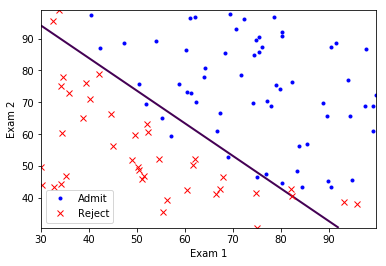

In [33]:
plt.plot(admits['Exam 1'], admits['Exam 2'], 'b.', label="Admit")
plt.plot(rejects['Exam 1'], rejects['Exam 2'], 'rx', label="Reject")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()


x1, x2 = np.meshgrid(np.linspace(X[:,1].min(), X[:,1].max()), np.linspace(X[:,2].min(), X[:,2].max()))
h = sigmoid(np.c_[np.ones((x1.ravel().shape[0],1)), x1.ravel(), x2.ravel()].dot(res_2.x)).reshape(x1.shape)
plt.contour(x1, x2, h, [0.5], linewidths=2)
plt.show()